# Custom datasets 

In [322]:
import torch
from torch import nn 
import requests
import zipfile
from pathlib import Path

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [323]:
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print("dir already exists")
else:
    print("dir does not exists, making dir...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    with open(data_path / "pizza_steak_sushi.zip", "wb") as file:
        request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
        file.write(request.content)
    
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zipf:
        zipf.extractall(image_path)
        

dir already exists


In [324]:
import os 
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"{len(dirnames)} directories, {len(filenames)} images in '{dirpath}'")

In [325]:
walk_through_dir(image_path)

2 directories, 0 images in 'data/pizza_steak_sushi'
3 directories, 0 images in 'data/pizza_steak_sushi/test'
0 directories, 25 images in 'data/pizza_steak_sushi/test/pizza'
0 directories, 19 images in 'data/pizza_steak_sushi/test/steak'
0 directories, 31 images in 'data/pizza_steak_sushi/test/sushi'
3 directories, 0 images in 'data/pizza_steak_sushi/train'
0 directories, 78 images in 'data/pizza_steak_sushi/train/pizza'
0 directories, 75 images in 'data/pizza_steak_sushi/train/steak'
0 directories, 72 images in 'data/pizza_steak_sushi/train/sushi'


In [326]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

data/pizza_steak_sushi/train/pizza/1899785.jpg
pizza
Image height: 512
Image width: 512


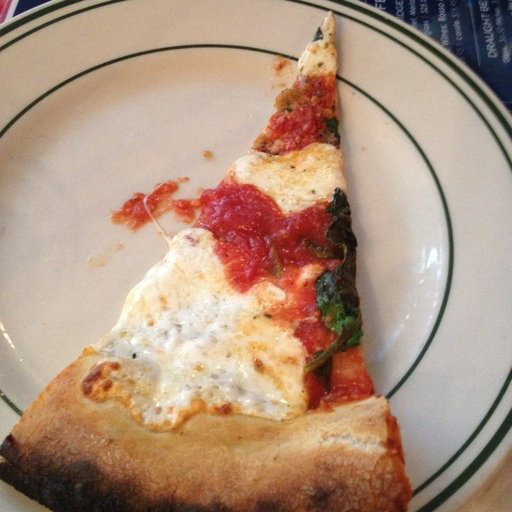

In [327]:
import random 
from PIL import Image 

image_path_list = list(image_path.glob("*/*/*.jpg"))

# print(*image_path_list, sep='\n')
random_image_path = random.choice(image_path_list)
print(random_image_path)

image_class = random_image_path.parent.stem 
print(image_class)

img = Image.open(random_image_path)
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(512, 512, 3)


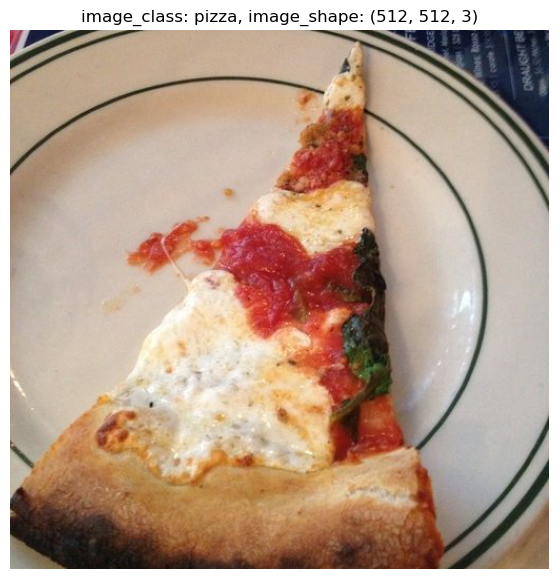

In [328]:
import numpy as np 
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)
print(img_as_array.shape)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"image_class: {image_class}, image_shape: {img_as_array.shape}")
plt.axis(False)
plt.show()

### transforming data

In [329]:
from torch.utils.data import DataLoader 
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

data_transform(img), data_transform(img).shape

(tensor([[[0.1137, 0.0784, 0.1020,  ..., 0.2471, 0.6745, 0.6745],
          [0.1020, 0.1373, 0.1098,  ..., 0.3373, 0.6078, 0.6510],
          [0.1020, 0.1843, 0.1647,  ..., 0.3725, 0.5804, 0.6667],
          ...,
          [0.5333, 0.5529, 0.5451,  ..., 0.2941, 0.4667, 0.5373],
          [0.5412, 0.5451, 0.5647,  ..., 0.4902, 0.5255, 0.5608],
          [0.5608, 0.5529, 0.5725,  ..., 0.5255, 0.5608, 0.5922]],
 
         [[0.1412, 0.1059, 0.1255,  ..., 0.2471, 0.5294, 0.3020],
          [0.1333, 0.1686, 0.1373,  ..., 0.3255, 0.5412, 0.3647],
          [0.1373, 0.2196, 0.1922,  ..., 0.3725, 0.5608, 0.5216],
          ...,
          [0.4196, 0.4314, 0.4157,  ..., 0.2431, 0.4118, 0.5020],
          [0.4431, 0.4314, 0.4392,  ..., 0.4353, 0.4941, 0.5490],
          [0.4588, 0.4471, 0.4549,  ..., 0.4980, 0.5490, 0.5922]],
 
         [[0.1961, 0.1725, 0.2000,  ..., 0.3373, 0.5882, 0.3843],
          [0.2000, 0.2392, 0.2118,  ..., 0.3843, 0.5961, 0.4510],
          [0.2196, 0.2941, 0.2667,  ...,

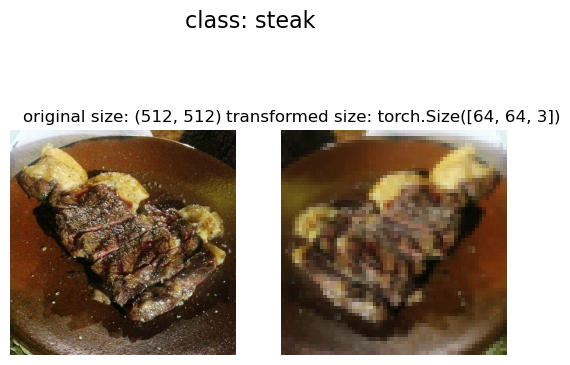

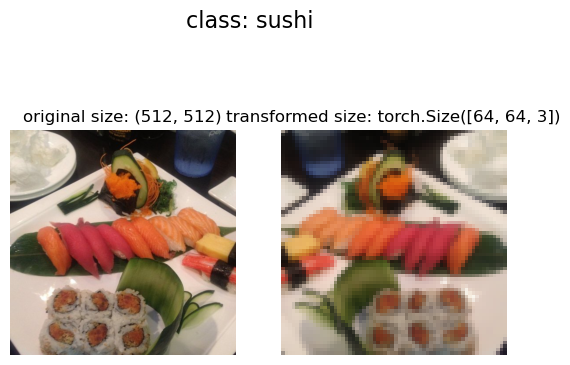

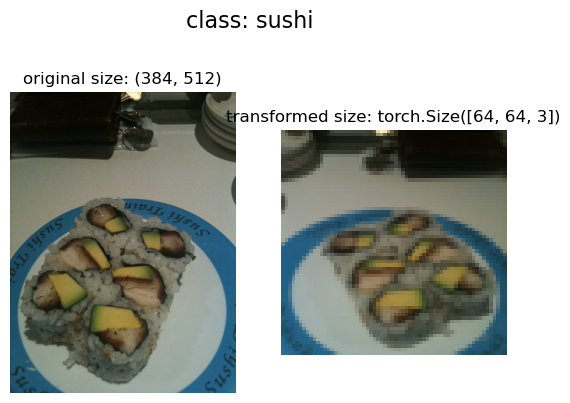

In [330]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
    if seed:
       random.seed(seed)
    
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as file:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(file)
            ax[0].set_title(f"original size: {file.size}")
            ax[0].axis(False)
                  
            transformed_image = transform(file).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"transformed size: {transformed_image.shape}")
            ax[1].axis(False)
             
            fig.suptitle(f"class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list, 
                        transform=data_transform,
                        n=3)

In [331]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, 
                                 transform=data_transform,
                                 target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=data_transform)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [332]:
class_names = train_data.classes 
class_dict = train_data.class_to_idx

print(class_names, class_dict)
print(len(train_data), len(test_data))

['pizza', 'steak', 'sushi'] {'pizza': 0, 'steak': 1, 'sushi': 2}
225 75


In [333]:
img, label = train_data[0][0], train_data[0][1]
print(img)
print(img.shape)
print(img.dtype)
print(class_names[label])

tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0157, 0.0157, 0.

torch.Size([64, 64, 3])


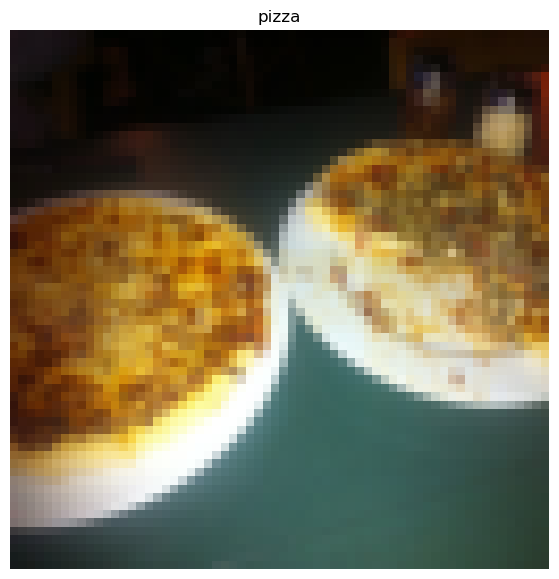

In [334]:
img_permute = img.permute(1, 2, 0)
print(img_permute.shape)
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label])
plt.show()

In [335]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32, 
                              num_workers=os.cpu_count(),
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=32, 
                             num_workers=os.cpu_count(),
                             shuffle=False)

len(train_dataloader), len(test_dataloader)

(8, 3)

In [336]:
img, label = next(iter(train_dataloader))
img.shape, label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

### createing custom DataSet

In [337]:
import os 
import pathlib 
import torch
from PIL import Image 
from torch.utils.data import Dataset 
from torchvision import transforms
from typing import Tuple, Dict, List 

In [338]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [339]:
target_directory = train_dir
print(f"target dir: {target_directory}")
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])

class_names_found

target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [340]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    if not classes:
        raise FileNotFoundError(f"couldn't find any classes in {directory}")
    

    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    
    return classes, class_to_idx
    
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [341]:
class ImageFolderCustom(Dataset):
    def __init__(self, targ_dir: str, transform=None):
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(targ_dir)
    
    def load_image(self, index: int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)
    
    def __len__(self) -> int:
       return len(self.paths) 
   
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        img = self.load_image(index)
        class_name = self.paths[index].parent.name 
        class_idx = self.class_to_idx[class_name]
        
        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx
            

In [342]:
train_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, 
                                     transform=test_transforms)

print(len(train_data_custom), len(test_data_custom))
print(train_data_custom.class_to_idx, train_data_custom.classes)

225 75
{'pizza': 0, 'steak': 1, 'sushi': 2} ['pizza', 'steak', 'sushi']


In [343]:
print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)

True
True


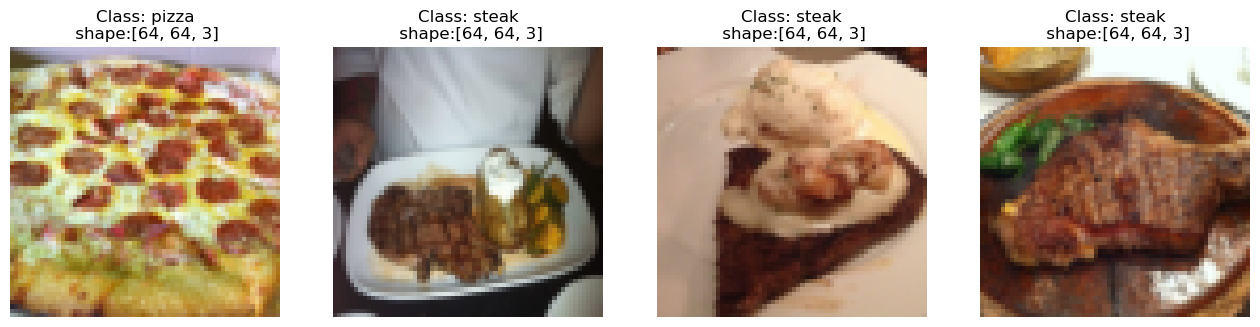

In [344]:
def display_random_images(dataset: torch.utils.data.Dataset, 
                          classes: List[str] = None, 
                          n: int = 5, 
                          display_shape: bool = True, 
                          seed: int = None):
    
    if seed:
        random.seed(seed)
        
    plt.figure(figsize=(16, 8))
    random_samples_idx = random.sample(range(len(dataset)), k=n)
    for i, target_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[target_sample][0], dataset[target_sample][1] 
        targ_image_adjust = targ_image.permute(1, 2, 0)
        
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis(False)
        if classes:
            title = f"Class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\n shape:{list(targ_image_adjust.shape)}"
        plt.title(title)     
        
display_random_images(train_data, n=4, classes=class_names)

In [345]:
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                              batch_size=32, 
                              num_workers=os.cpu_count(),
                              shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                             batch_size=32, 
                             num_workers=os.cpu_count(),
                             shuffle=False)

img_custom, label_custom = next(iter(train_dataloader_custom))
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

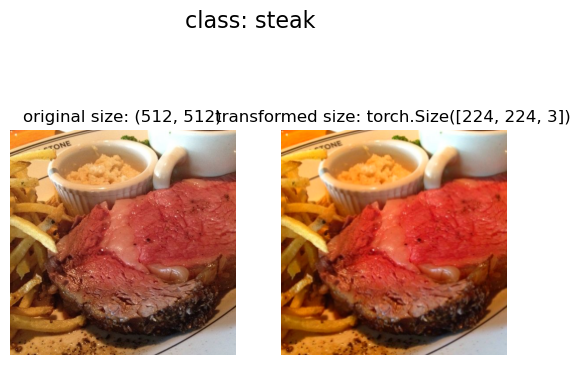

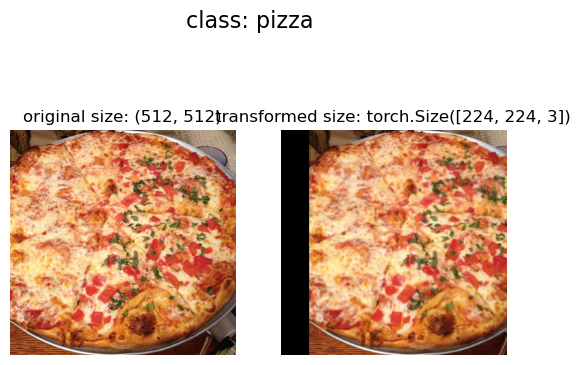

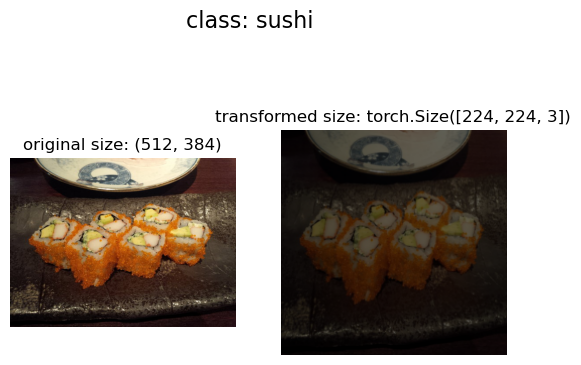

In [346]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=3 
)
    

### model0

In [347]:
simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

train_data_simple = datasets.ImageFolder(root=train_dir, 
                                         transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, 
                                        transform=simple_transform)

BATCH_SIZE = 32 
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(dataset=train_data_simple, 
                                     batch_size=BATCH_SIZE, 
                                     shuffle=True, 
                                     num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)



In [348]:
class TinyVGG(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units: int, 
                 output_shape: int):
        super().__init__() 
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1, 
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1, 
                      padding=0),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1, 
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1, 
                      padding=0),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(in_features=hidden_units*169, 
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, 
                      out_features=output_shape)
        )
        
    def forward(self, x):
        return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [349]:
torch.manual_seed(42)
model0 = TinyVGG(input_shape=3, 
                 hidden_units=10, 
                 output_shape=len(class_names)).to(device)
model0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=3, bias=True)
  )
)

In [350]:
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [351]:
model0(image_batch.to(device))

tensor([[ 0.0965, -0.0874, -0.1685],
        [ 0.0980, -0.0916, -0.1637],
        [ 0.0989, -0.0878, -0.1675],
        [ 0.0976, -0.0899, -0.1659],
        [ 0.0973, -0.0903, -0.1653],
        [ 0.0993, -0.0871, -0.1669],
        [ 0.0980, -0.0880, -0.1668],
        [ 0.0976, -0.0864, -0.1692],
        [ 0.0992, -0.0859, -0.1677],
        [ 0.0976, -0.0863, -0.1683],
        [ 0.0977, -0.0898, -0.1658],
        [ 0.0980, -0.0876, -0.1680],
        [ 0.0978, -0.0878, -0.1671],
        [ 0.0994, -0.0882, -0.1662],
        [ 0.0969, -0.0901, -0.1653],
        [ 0.0997, -0.0863, -0.1680],
        [ 0.0982, -0.0871, -0.1685],
        [ 0.0993, -0.0872, -0.1681],
        [ 0.0994, -0.0879, -0.1669],
        [ 0.1008, -0.0887, -0.1653],
        [ 0.0993, -0.0898, -0.1649],
        [ 0.0991, -0.0852, -0.1694],
        [ 0.0989, -0.0879, -0.1666],
        [ 0.0982, -0.0891, -0.1663],
        [ 0.1000, -0.0884, -0.1655],
        [ 0.0983, -0.0885, -0.1668],
        [ 0.0982, -0.0886, -0.1658],
 

In [352]:
from torchinfo import summary
summary(model0, input_size=[32, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 30, 30]          --
│    └─Conv2d: 2-1                       [32, 10, 62, 62]          280
│    └─ReLU: 2-2                         [32, 10, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 10, 60, 60]          910
│    └─ReLU: 2-4                         [32, 10, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 10, 30, 30]          --
├─Sequential: 1-2                        [32, 10, 13, 13]          --
│    └─Conv2d: 2-6                       [32, 10, 28, 28]          910
│    └─ReLU: 2-7                         [32, 10, 28, 28]          --
│    └─Conv2d: 2-8                       [32, 10, 26, 26]          910
│    └─ReLU: 2-9                         [32, 10, 26, 26]          --
│    └─MaxPool2d: 2-10                   [32, 10, 13, 13]          --
├─Sequentia

In [353]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc


In [354]:
import torch.utils
import torch.utils.data
from tqdm.auto import tqdm

def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module, 
          optimizer: torch.optim.Optimizer, 
          accuracy_fn, 
          epochs: int, 
          device: torch.device = device):
    
    
    results = {"train_loss": [],
               "train_acc": [], 
               "test_loss": [], 
               "test_acc": []}
    
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model, 
                                           dataloader=train_dataloader, 
                                           loss_fn=loss_fn, 
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(dataloader=test_dataloader,
                                        model=model,
                                        loss_fn=loss_fn)
        print(f"epoch: {epoch}, train_loss: {train_loss:.4f}, test_loss: {test_loss:.4f}, train_acc: {train_acc:.4f}, test_acc: {test_acc:.4f}")
        results["train_loss"].append(train_loss)
        results["test_loss"].append(test_loss)
        results["train_acc"].append(train_acc)
        results["test_acc"].append(test_acc)
        
    return results

In [355]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
EPOCHS_NUM = 4

model0 = TinyVGG(input_shape=3, 
                 hidden_units=10,
                 output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model0.parameters(),
                             lr=0.001)

from timeit import default_timer as timer
from helper_functions import accuracy_fn
start_time = timer()

model0_results = train(model=model0,
                       train_dataloader=train_dataloader_simple,
                       test_dataloader=test_dataloader_simple,
                       loss_fn=loss_fn, 
                       optimizer=optimizer, 
                       accuracy_fn=accuracy_fn, 
                       epochs= EPOCHS_NUM,
                       device=device)

end_time = timer()
print()
print(f"training time: {end_time - start_time:.2f}")

  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:03<00:10,  3.45s/it]

epoch: 0, train_loss: 1.0886, test_loss: 1.1139, train_acc: 0.4258, test_acc: 0.2604


 50%|█████     | 2/4 [00:06<00:06,  3.17s/it]

epoch: 1, train_loss: 1.1079, test_loss: 1.1056, train_acc: 0.3047, test_acc: 0.2604


 75%|███████▌  | 3/4 [00:09<00:03,  3.07s/it]

epoch: 2, train_loss: 1.0979, test_loss: 1.0747, train_acc: 0.3047, test_acc: 0.2604


100%|██████████| 4/4 [00:12<00:00,  3.06s/it]

epoch: 3, train_loss: 1.0844, test_loss: 1.0617, train_acc: 0.3438, test_acc: 0.6146

training time: 12.23


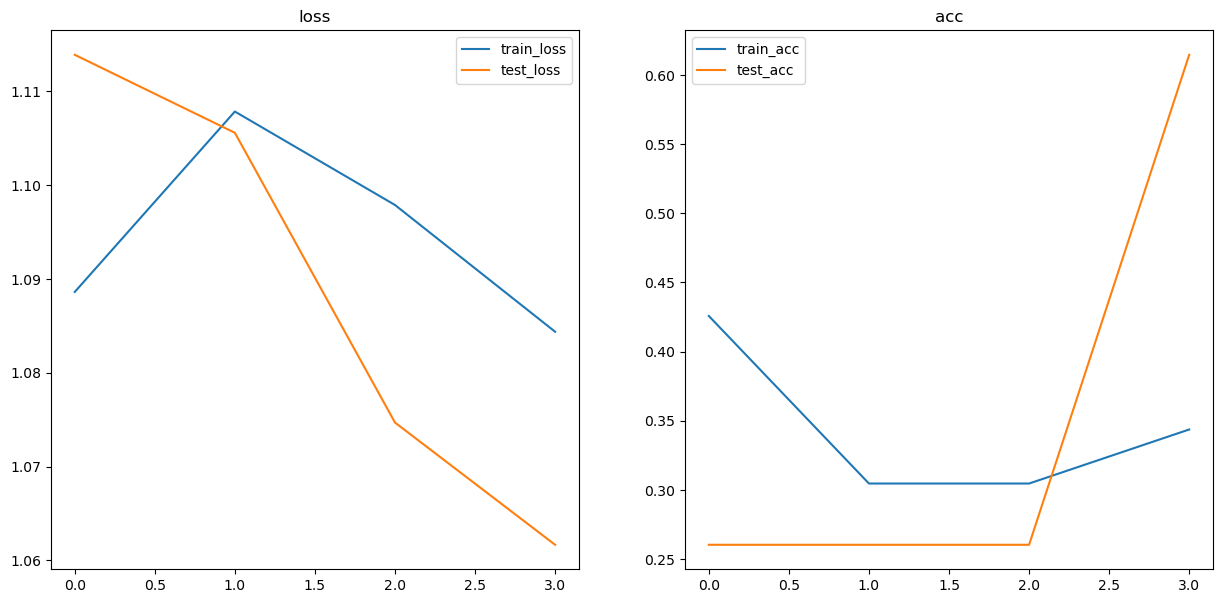

In [356]:
def plot_loss(res: Dict[str, List[float]]):
    loss = res["train_loss"]
    test_loss = res["test_loss"]
    acc = res["train_acc"]
    test_acc = res["test_acc"] 
    
    epochs = range(len(loss))
    plt.figure(figsize=(15, 7))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("loss")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, label="train_acc")
    plt.plot(epochs, test_acc, label="test_acc")
    plt.title("acc")
    plt.legend()
    
    plt.show()
    
plot_loss(model0_results)
    
    
    
    

### model 1

In [357]:
train_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)), 
    transforms.TrivialAugmentWide(num_magnitude_bins=31), 
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)), 
    transforms.ToTensor()
])

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=train_transform)
test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=test_transform)

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
torch.manual_seed(42)

train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data, 
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=False)


In [358]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model1 = TinyVGG(input_shape=3, 
                 hidden_units=10,
                 output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model0.parameters(),
                             lr=0.001)

from timeit import default_timer as timer
from helper_functions import accuracy_fn
start_time = timer()

model1_results = train(model=model0,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       loss_fn=loss_fn, 
                       optimizer=optimizer, 
                       accuracy_fn=accuracy_fn, 
                       epochs= EPOCHS_NUM,
                       device=device)

end_time = timer()
print()
print(f"training time: {end_time - start_time:.2f}")

 25%|██▌       | 1/4 [00:03<00:09,  3.13s/it]

epoch: 0, train_loss: 1.0646, test_loss: 1.0386, train_acc: 0.3516, test_acc: 0.3428


 50%|█████     | 2/4 [00:06<00:06,  3.11s/it]

epoch: 1, train_loss: 1.0869, test_loss: 1.0634, train_acc: 0.3672, test_acc: 0.2917


 75%|███████▌  | 3/4 [00:09<00:03,  3.05s/it]

epoch: 2, train_loss: 1.0270, test_loss: 1.0428, train_acc: 0.5195, test_acc: 0.3324


100%|██████████| 4/4 [00:12<00:00,  3.14s/it]

epoch: 3, train_loss: 1.0143, test_loss: 0.9828, train_acc: 0.5977, test_acc: 0.5938

training time: 12.58


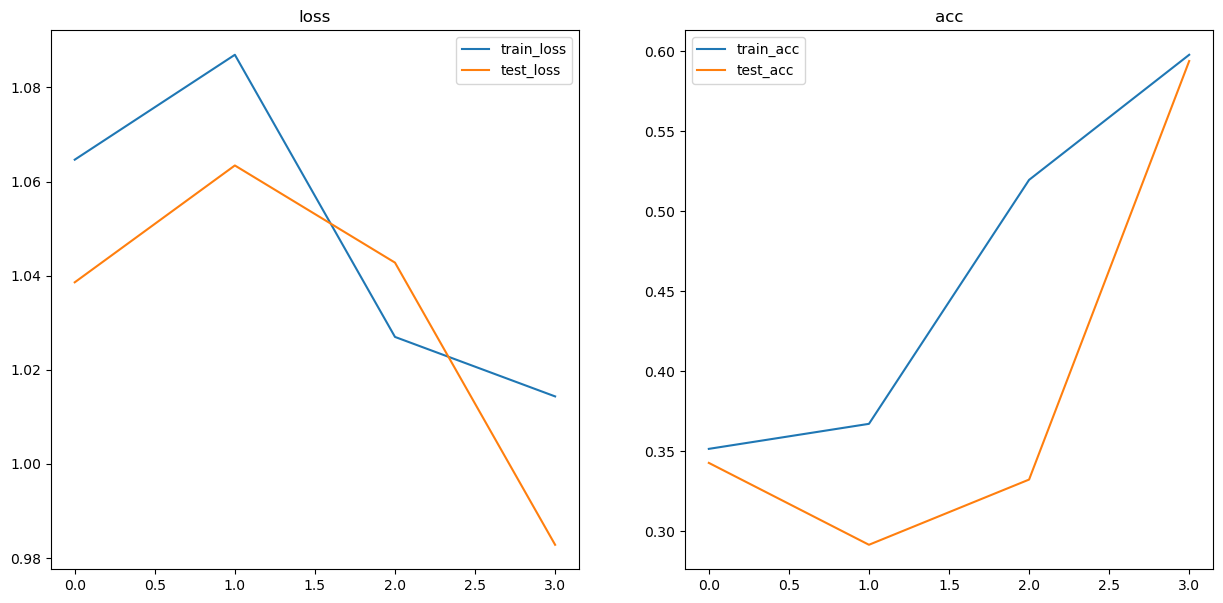

In [359]:
plot_loss(model1_results)

In [360]:
import pandas as pd 
model0df = pd.DataFrame(model0_results)
model1df = pd.DataFrame(model1_results)
model0df

,train_loss,train_acc,test_loss,test_acc
0,1.088619,0.425781,1.113906,0.260417
1,1.107856,0.304688,1.105590,0.260417
2,1.097892,0.304688,1.074696,0.260417
3,1.084379,0.343750,1.061666,0.614583


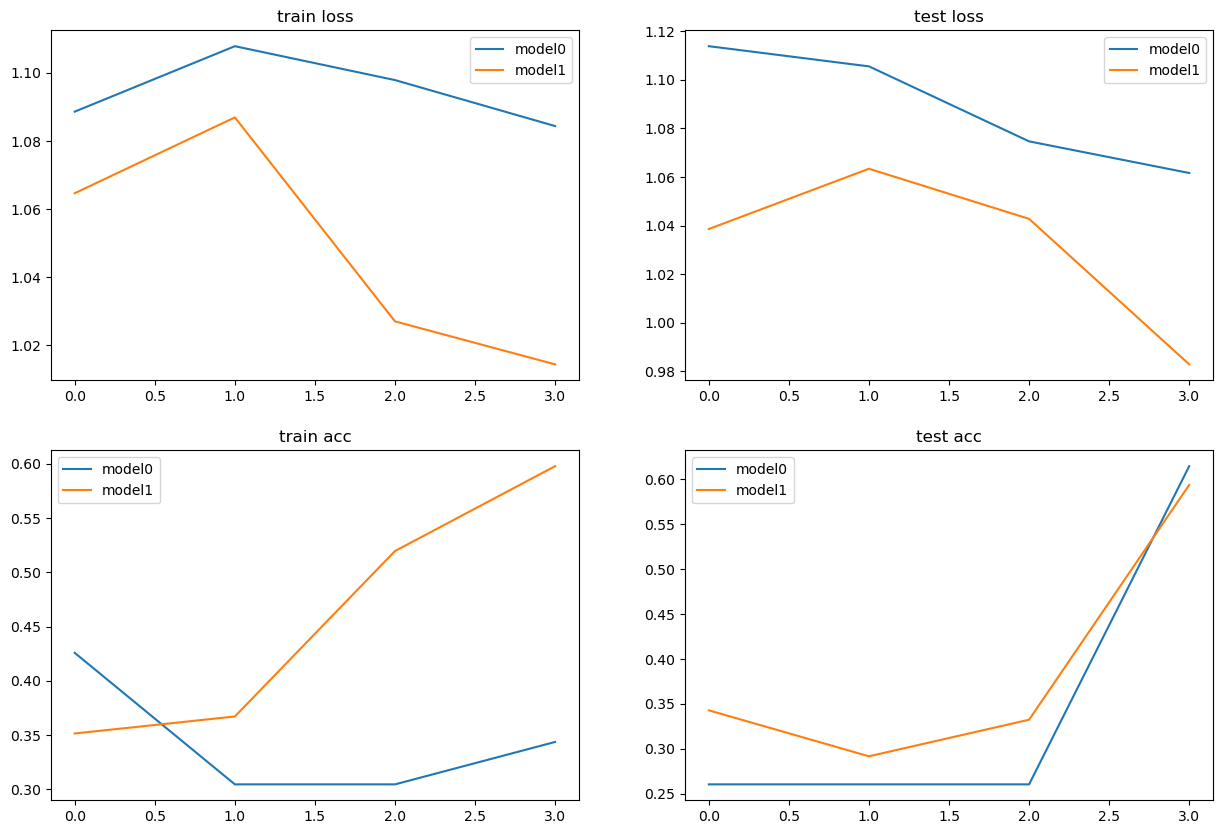

In [361]:
plt.figure(figsize=(15, 10))
epochs = range(len(model0df))

plt.subplot(2, 2, 1)
plt.plot(epochs, model0df["train_loss"], label="model0")
plt.plot(epochs, model1df["train_loss"], label="model1")
plt.title("train loss")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, model0df["test_loss"], label="model0")
plt.plot(epochs, model1df["test_loss"], label="model1")
plt.title("test loss")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, model0df["train_acc"], label="model0")
plt.plot(epochs, model1df["train_acc"], label="model1")
plt.title("train acc")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, model0df["test_acc"], label="model0")
plt.plot(epochs, model1df["test_acc"], label="model1")
plt.title("test acc")
plt.legend()

plt.show()


### making prediction on custom image

In [362]:
import requests 

custom_image_path = data_path / "04-pizza-dad.jpeg" 
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as file: 
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        file.write(request.content)

torch.Size([3, 64, 64])
tensor([[[0.4673, 0.5292, 0.5601,  ..., 0.0976, 0.0604, 0.0578],
         [0.4014, 0.4351, 0.4291,  ..., 0.0671, 0.0714, 0.0848],
         [0.5172, 0.4849, 0.4472,  ..., 0.0613, 0.0605, 0.0694],
         ...,
         [0.2999, 0.2819, 0.2705,  ..., 0.4570, 0.4019, 0.3955],
         [0.2767, 0.2697, 0.2606,  ..., 0.4620, 0.4208, 0.3763],
         [0.2502, 0.2557, 0.2690,  ..., 0.4894, 0.6088, 0.5344]],

        [[0.4926, 0.5517, 0.5773,  ..., 0.1246, 0.0688, 0.0680],
         [0.4545, 0.4876, 0.4600,  ..., 0.0806, 0.0824, 0.1022],
         [0.5485, 0.5217, 0.4785,  ..., 0.0689, 0.0704, 0.0882],
         ...,
         [0.2066, 0.1971, 0.1882,  ..., 0.3125, 0.2772, 0.2778],
         [0.1922, 0.1870, 0.1805,  ..., 0.3217, 0.2926, 0.2662],
         [0.1730, 0.1777, 0.1865,  ..., 0.3425, 0.4223, 0.3684]],

        [[0.4510, 0.5250, 0.5622,  ..., 0.0806, 0.0408, 0.0439],
         [0.3132, 0.3614, 0.3848,  ..., 0.0508, 0.0532, 0.0766],
         [0.4766, 0.4248, 0.3951, 

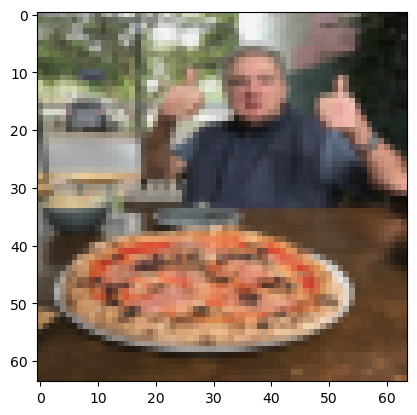

In [363]:
import torchvision
custom_image = torchvision.io.read_image(custom_image_path)
custom_image.shape
custom_image = custom_image.type(torch.float).to(device) / 255.
custom_transform = transforms.Compose([
    transforms.Resize(size=(64, 64))
])

custom_image = custom_transform(custom_image)
print(custom_image.shape)
print(custom_image)
plt.imshow(custom_image.permute(1, 2, 0).cpu())

In [364]:
model0.eval()
with torch.inference_mode():
    logits = model0(custom_image.unsqueeze(dim=0))
    
print(logits)
pred_probs = torch.softmax(logits, dim=1)
print(pred_probs)
pred = torch.argmax(pred_probs, dim=1)
print(pred)
print(class_names[pred])

tensor([[ 0.0018, -0.1837, -0.0291]], device='cuda:0')
tensor([[0.3571, 0.2966, 0.3462]], device='cuda:0')
tensor([0], device='cuda:0')
pizza
